In [ ]:
# !pip install --upgrade pandas-profiling
# !pip install pydantic-settings


In [ ]:
!pip install --upgrade pandas-profiling
!pip install pydantic-settings
!pip install --upgrade tensorflow
!pip install scikeras
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import tensorflow as tf # Import tensorflow
from tensorflow.keras.models import Sequential # Use tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from scikeras.wrappers import KerasClassifier # Import from the correct location
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data = pd.read_csv("/content/cardio_train.csv", sep=";")

In [ ]:

data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [ ]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [ ]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [ ]:
#
!pip install --upgrade typeguard
!pip install typing_extensions
!pip install ydata-profiling
import ydata_profiling as yp

yp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [ ]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [ ]:
train.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
31684,21263,2,160,76.0,130,80,1,1,0,1,1,29.687500
5634,14684,2,184,70.0,120,80,1,1,0,0,1,20.675803
58675,23436,1,158,76.0,120,80,1,1,0,0,1,30.443839


In [ ]:
test.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
51756,20272,1,161,75.0,120,80,1,1,0,0,1,28.934069
9378,21872,1,175,70.0,120,70,1,1,0,0,1,22.857143
5060,18140,1,165,65.0,120,80,2,2,0,0,1,23.875115


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55180 entries, 31684 to 69281
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          55180 non-null  int64  
 1   gender       55180 non-null  int64  
 2   height       55180 non-null  int64  
 3   weight       55180 non-null  float64
 4   ap_hi        55180 non-null  int64  
 5   ap_lo        55180 non-null  int64  
 6   cholesterol  55180 non-null  int64  
 7   gluc         55180 non-null  int64  
 8   smoke        55180 non-null  int64  
 9   alco         55180 non-null  int64  
 10  active       55180 non-null  int64  
 11  bmi          55180 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 5.5 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13795 entries, 51756 to 61199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          13795 non-null  int64  
 1   gender       13795 non-null  int64  
 2   height       13795 non-null  int64  
 3   weight       13795 non-null  float64
 4   ap_hi        13795 non-null  int64  
 5   ap_lo        13795 non-null  int64  
 6   cholesterol  13795 non-null  int64  
 7   gluc         13795 non-null  int64  
 8   smoke        13795 non-null  int64  
 9   alco         13795 non-null  int64  
 10  active       13795 non-null  int64  
 11  bmi          13795 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.4 MB


In [ ]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72.19

In [ ]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

72.59

In [ ]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,gluc,0.348144
3,ap_hi,0.073874
7,smoke,0.070501
4,ap_lo,0.050402
5,cholesterol,0.018532
1,height,0.010972
0,gender,0.000147
8,alco,-0.019003
9,active,-0.023553
2,weight,-0.075778


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

60.22

In [ ]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

59.41

In [ ]:
# Linear SVC

linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

72.11

In [ ]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

72.71

In [ ]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

81.52 {'n_neighbors': 3}


In [ ]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

66.87

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

70.27

In [ ]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

70.26

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

63.3

In [ ]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

62.59

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

50.03

In [ ]:
acc_test_sgd = round(sgd.score(test, target_test) * 100, 2)
acc_test_sgd

50.68

In [ ]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

99.98

In [ ]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

64.01

In [ ]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.98 {'n_estimators': 300}


In [ ]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

71.66

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

# Define the parameters for the XGBoost classifier
params = {
    'learning_rate': 0.1,  # Example parameter, adjust as needed
    'max_depth': 3,        # Example parameter, adjust as needed
    # Add other parameters as required
}

XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(train, target)
acc_XGB_Classifier = round(XGB_Classifier.score(train, target) * 100, 2)
acc_XGB_Classifier

73.63

In [ ]:
acc_test_XGB_Classifier = round(XGB_Classifier.score(test, target_test) * 100, 2)
acc_test_XGB_Classifier

73.75

In [ ]:
acc_test_XGB_Classifier = round(XGB_Classifier.score(test, target_test) * 100, 2)
acc_test_XGB_Classifier

73.75

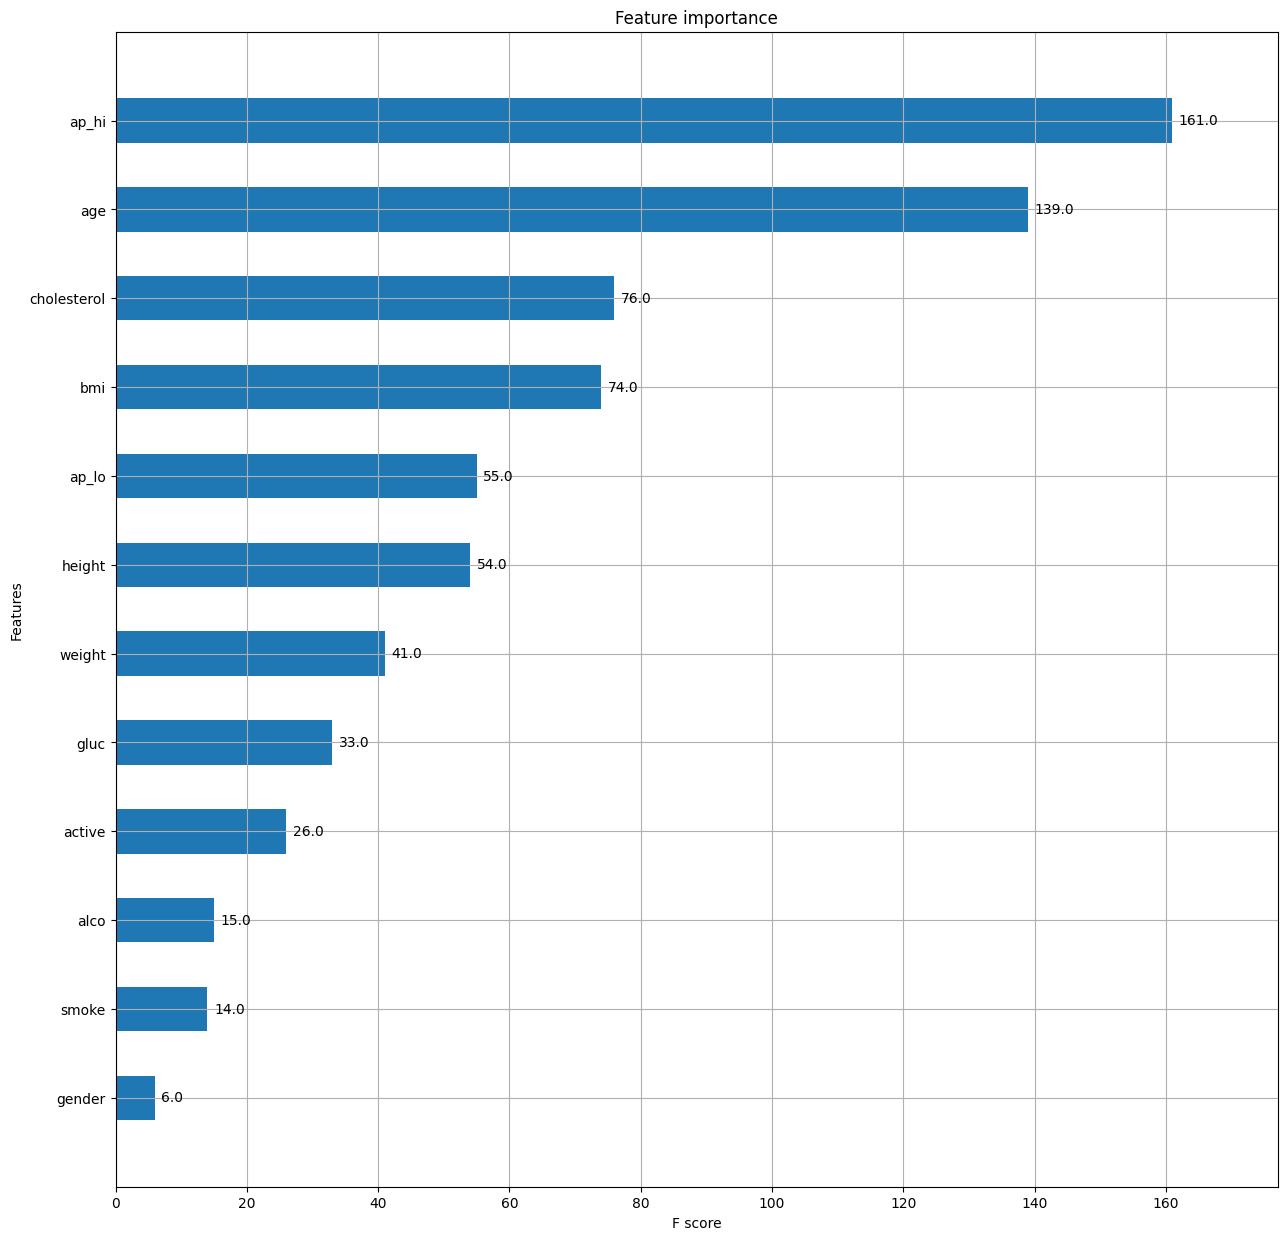

In [ ]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(XGB_Classifier,ax = axes,height =0.5)
plt.show();
plt.close()

In [ ]:
LGB_Classifier = LGBMClassifier(**params)
LGB_Classifier.fit(train, target)
acc_LGB_Classifier = round(LGB_Classifier.score(train, target) * 100, 2)
acc_LGB_Classifier

[LightGBM] [Info] Number of positive: 27221, number of negative: 27959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 55180, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493313 -> initscore=-0.026750
[LightGBM] [Info] Start training from score -0.026750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

73.72

In [ ]:
acc_test_LGB_Classifier = round(LGB_Classifier.score(test, target_test) * 100, 2)
acc_test_LGB_Classifier

73.83

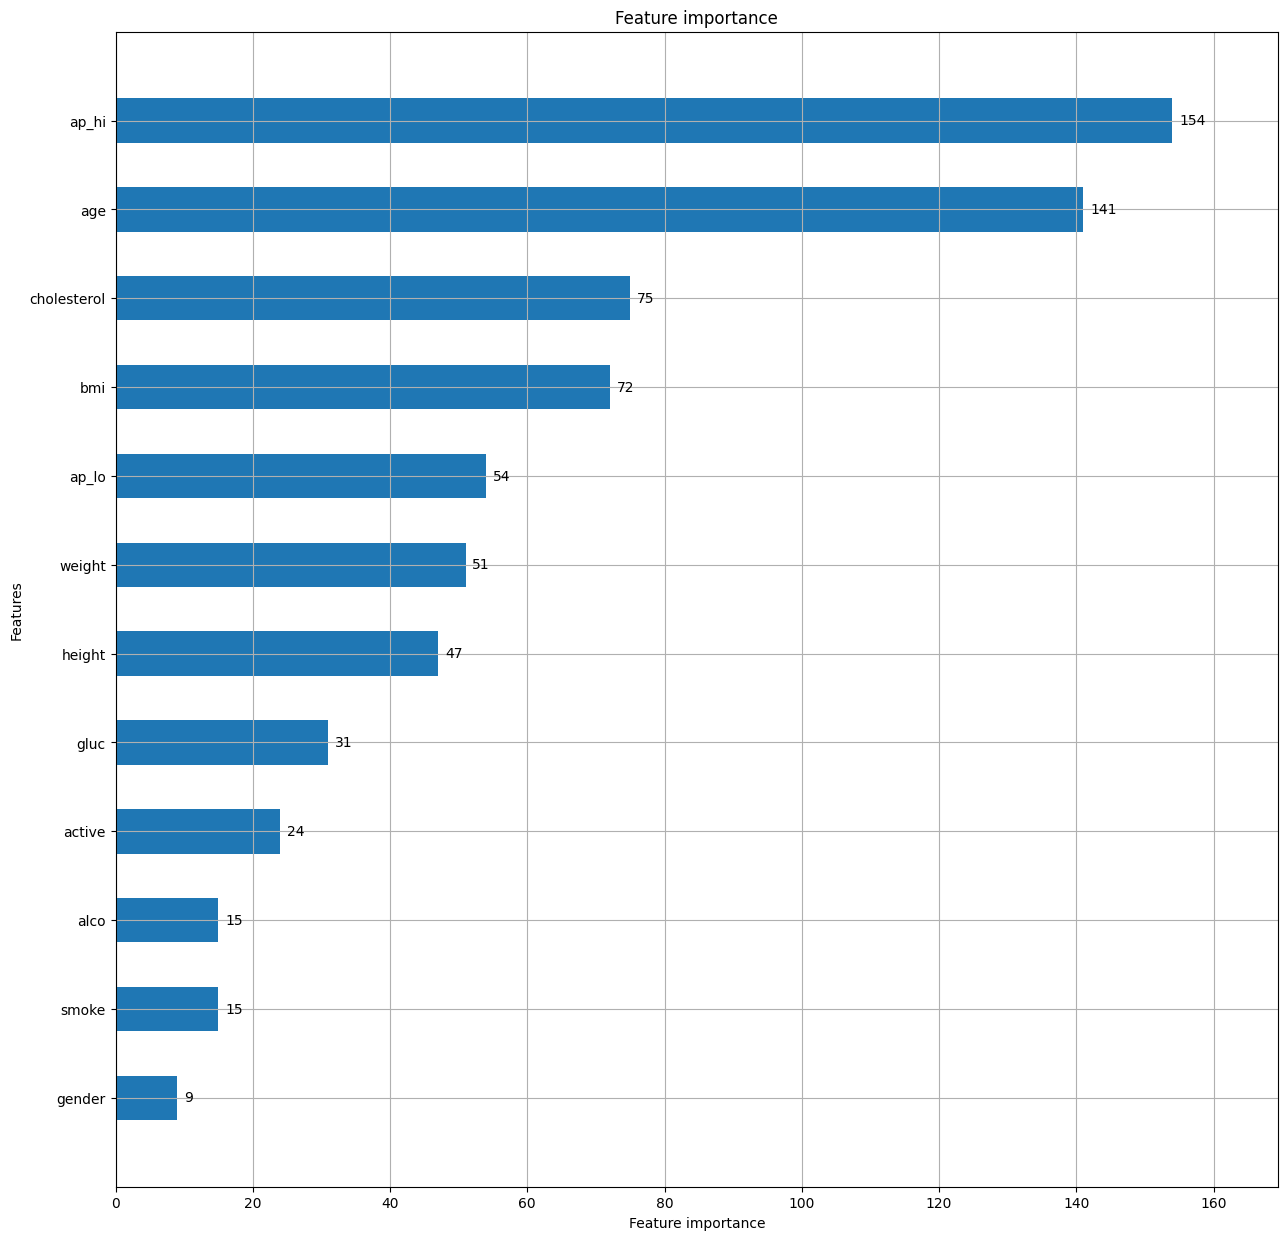

In [ ]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(LGB_Classifier,ax = axes,height = 0.5)
plt.show();
plt.close()

In [ ]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier(**params)
gradient_boosting.fit(train, target)
acc_gradient_boosting = round(gradient_boosting.score(train, target) * 100, 2)
acc_gradient_boosting

73.75

In [ ]:
acc_test_gradient_boosting = round(gradient_boosting.score(test, target_test) * 100, 2)
acc_test_gradient_boosting

73.83

In [ ]:
# Ridge Classifier

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(train, target)
acc_ridge_classifier = round(ridge_classifier.score(train, target) * 100, 2)
acc_ridge_classifier

72.34

In [ ]:
acc_test_ridge_classifier = round(ridge_classifier.score(test, target_test) * 100, 2)
acc_test_ridge_classifier

72.58

In [ ]:
# Bagging Classifier

bagging_classifier = BaggingClassifier()
bagging_classifier.fit(train, target)
Y_pred = bagging_classifier.predict(test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(train, target) * 100, 2)
acc_bagging_classifier

97.91

In [ ]:
acc_test_bagging_classifier = round(bagging_classifier.score(test, target_test) * 100, 2)
acc_test_bagging_classifier

69.35

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 'k-Nearest Neighbors', 'Naive Bayes',
              'Perceptron', 'Stochastic Gradient Decent',
              'Decision Tree Classifier', 'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'RidgeClassifier', 'BaggingClassifier'],

    'Score_train': [acc_log, acc_svc, acc_linear_svc, acc_knn, acc_gaussian,
              acc_perceptron, acc_sgd,
              acc_decision_tree, acc_random_forest, acc_XGB_Classifier, acc_LGB_Classifier,
              acc_gradient_boosting, acc_ridge_classifier, acc_bagging_classifier],
    'Score_test': [acc_test_log, acc_test_svc, acc_test_linear_svc, acc_test_knn, acc_test_gaussian,
              acc_test_perceptron, acc_test_sgd,
              acc_test_decision_tree, acc_test_random_forest, acc_test_XGB_Classifier, acc_test_LGB_Classifier,
              acc_test_gradient_boosting, acc_test_ridge_classifier, acc_test_bagging_classifier]
                    })

In [ ]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
8,Random Forest,99.98,71.66
7,Decision Tree Classifier,99.98,64.01
13,BaggingClassifier,97.91,69.35
3,k-Nearest Neighbors,81.52,66.87
11,GradientBoostingClassifier,73.75,73.83
10,LGBMClassifier,73.72,73.83
9,XGBClassifier,73.63,73.75
12,RidgeClassifier,72.34,72.58
0,Logistic Regression,72.19,72.59
2,Linear SVC,72.11,72.71


In [ ]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
11,GradientBoostingClassifier,73.75,73.83
10,LGBMClassifier,73.72,73.83
9,XGBClassifier,73.63,73.75
2,Linear SVC,72.11,72.71
0,Logistic Regression,72.19,72.59
12,RidgeClassifier,72.34,72.58
8,Random Forest,99.98,71.66
4,Naive Bayes,70.27,70.26
13,BaggingClassifier,97.91,69.35
3,k-Nearest Neighbors,81.52,66.87


In [ ]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
4,Naive Bayes,70.27,70.26,0.01
11,GradientBoostingClassifier,73.75,73.83,0.08
10,LGBMClassifier,73.72,73.83,0.11
9,XGBClassifier,73.63,73.75,0.12
12,RidgeClassifier,72.34,72.58,0.24
0,Logistic Regression,72.19,72.59,0.40
2,Linear SVC,72.11,72.71,0.60
6,Stochastic Gradient Decent,50.03,50.68,0.65
5,Perceptron,63.30,62.59,0.71
1,Support Vector Machines,60.22,59.41,0.81


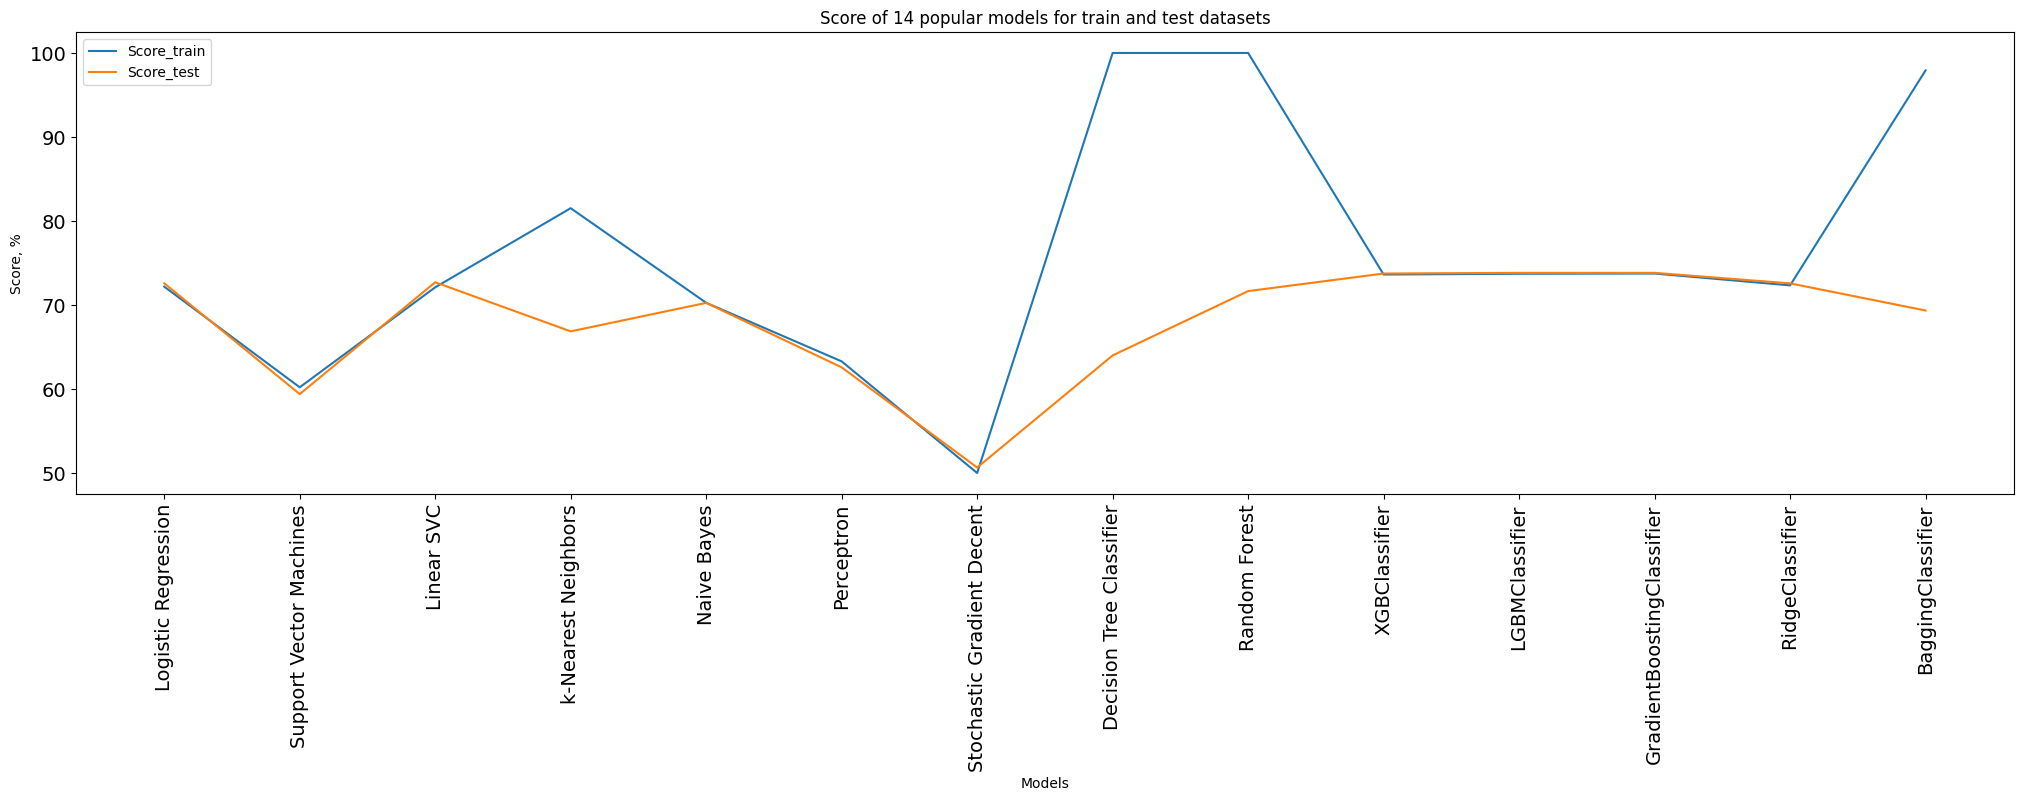

In [ ]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 14 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()